### Loan Prediction 

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [58]:
df = pd.read_csv(r'C:\Users\home\Desktop\MyProjects\LoanPrediction\train.csv')

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Data Description:

- Loan_ID: Unique identifier for each loan application.

- Gender: Gender of the applicant (Male/Female).

- Married: Applicant's marital status (Yes/No).

- Dependents: Number of dependents on the applicant (0, 1, 2, 3+).

- Education: Education level of the applicant (Graduate/Not Graduate).

- Self_Employed: Whether the applicant is self-employed or not (Yes/No).

- ApplicantIncome: Income of the applicant.

- CoapplicantIncome: Income of the co-applicant (if any).

- LoanAmount: Amount of loan applied for (in thousands).

- Loan_Amount_Term: Term of the loan (in months).

- Credit_History: Credit history meets guidelines (1.0 for Yes, 0.0 for No).

- Property_Area: Area where the property associated with the loan is located (Urban/Semiurban/Rural).

- Loan_Status: Loan approval status (Y for Yes, N for No).

### Exploratory Data Analysis

In [60]:
CatVar = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term',
         'Credit_History', 'Property_Area', 'Loan_Status']

In [61]:
for i in CatVar:
    print(df[i].value_counts())
    print('---------------------------')

Gender
Male      489
Female    112
Name: count, dtype: int64
---------------------------
Married
Yes    398
No     213
Name: count, dtype: int64
---------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
---------------------------
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
---------------------------
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
---------------------------
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
---------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
---------------------------
Loan_Status
Y    422
N    192
Name: count, dtype: int64
---------------------------


In [62]:
df.shape

(614, 13)

In [63]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [64]:
# Missing Data

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [65]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().mean())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0])

In [66]:
# Value_counts after treating missing values

for i in CatVar:
    print(df[i].value_counts())
    print('---------------------------')

Gender
Male      502
Female    112
Name: count, dtype: int64
---------------------------
Married
Yes    401
No     213
Name: count, dtype: int64
---------------------------
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
---------------------------
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
---------------------------
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
---------------------------
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
---------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
---------------------------
Loan_Status
Y    422
N    192
Name: count, dtype: int64
---------------------------


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


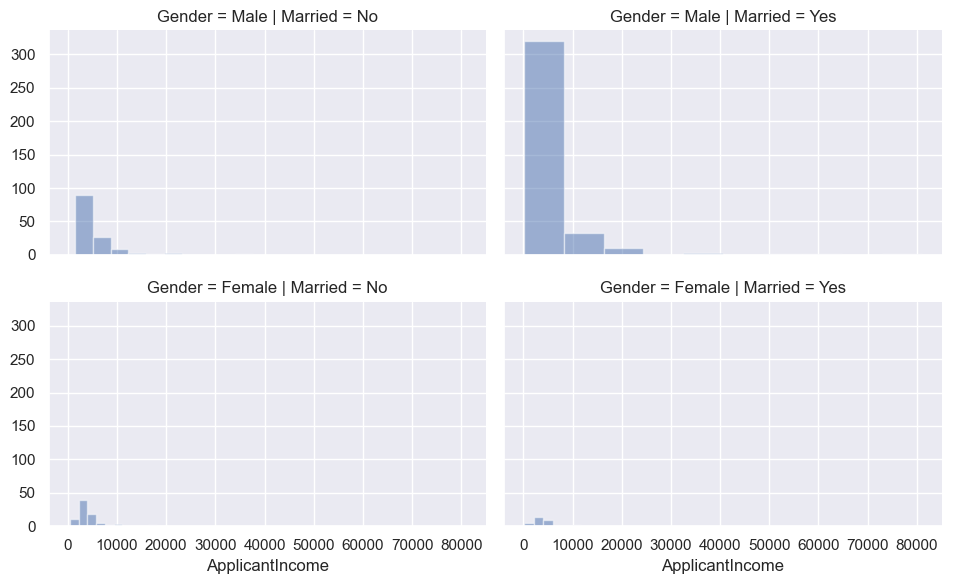

In [67]:
grid = sns.FacetGrid(df, row='Gender', col = 'Married', aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()
plt.show()

Each subplot in the grid shows how 'ApplicantIncome' is distributed among various combinations of 'Gender' and 'Married' status.

This visualization helps in understanding how 'ApplicantIncome' varies across different demographic segments ('Gender' and 'Married'), which can be crucial in assessing factors influencing loan applications or financial decisions.

##### Interpretation:
- Across all categories, the applicant incomes are skewed towards the lower end, with the majority of applicants earning less than 10,000.
- There are very few high-income outliers in all categories.
- The distributions do not show significant differences between males and females or between married and unmarried individuals in terms of applicant income.

This suggests that applicant income is generally low across all groups in this dataset, with only a small number of individuals having higher incomes.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


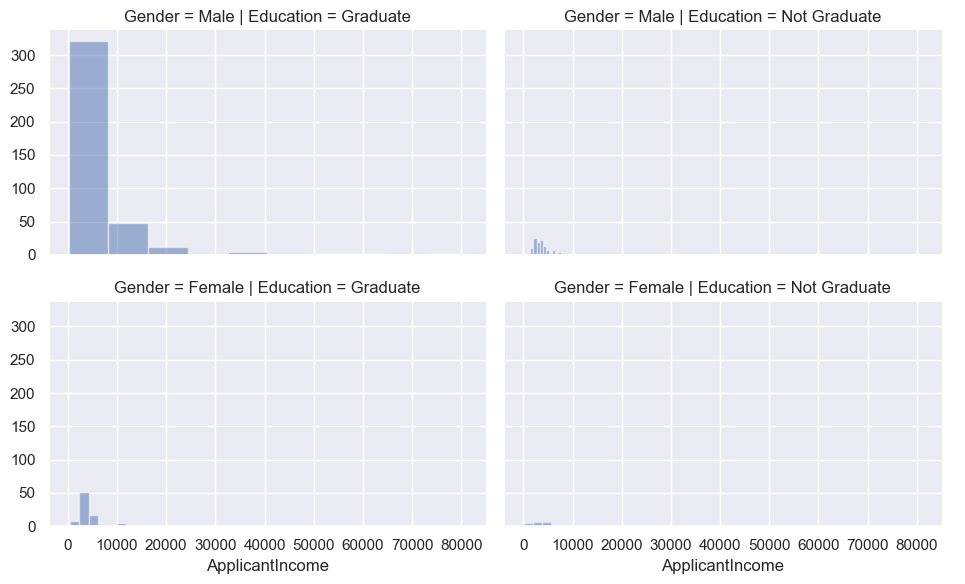

In [68]:
grid = sns.FacetGrid(df, row='Gender', col='Education', aspect = 1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

##### Interpretation:

- Across all categories, applicant incomes are skewed towards the lower end, with the majority of applicants earning less than 10,000.
- Male graduates have a slightly higher income distribution compared to non-graduates.
- Female graduates and non-graduates have similar income distributions, with most earning less than 10,000.
- There are very few high-income outliers in all categories.

This suggests that applicant income is generally low across all groups in this dataset, with only a small number of individuals having higher incomes. Graduates, particularly males, tend to have slightly higher incomes compared to non-graduates.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


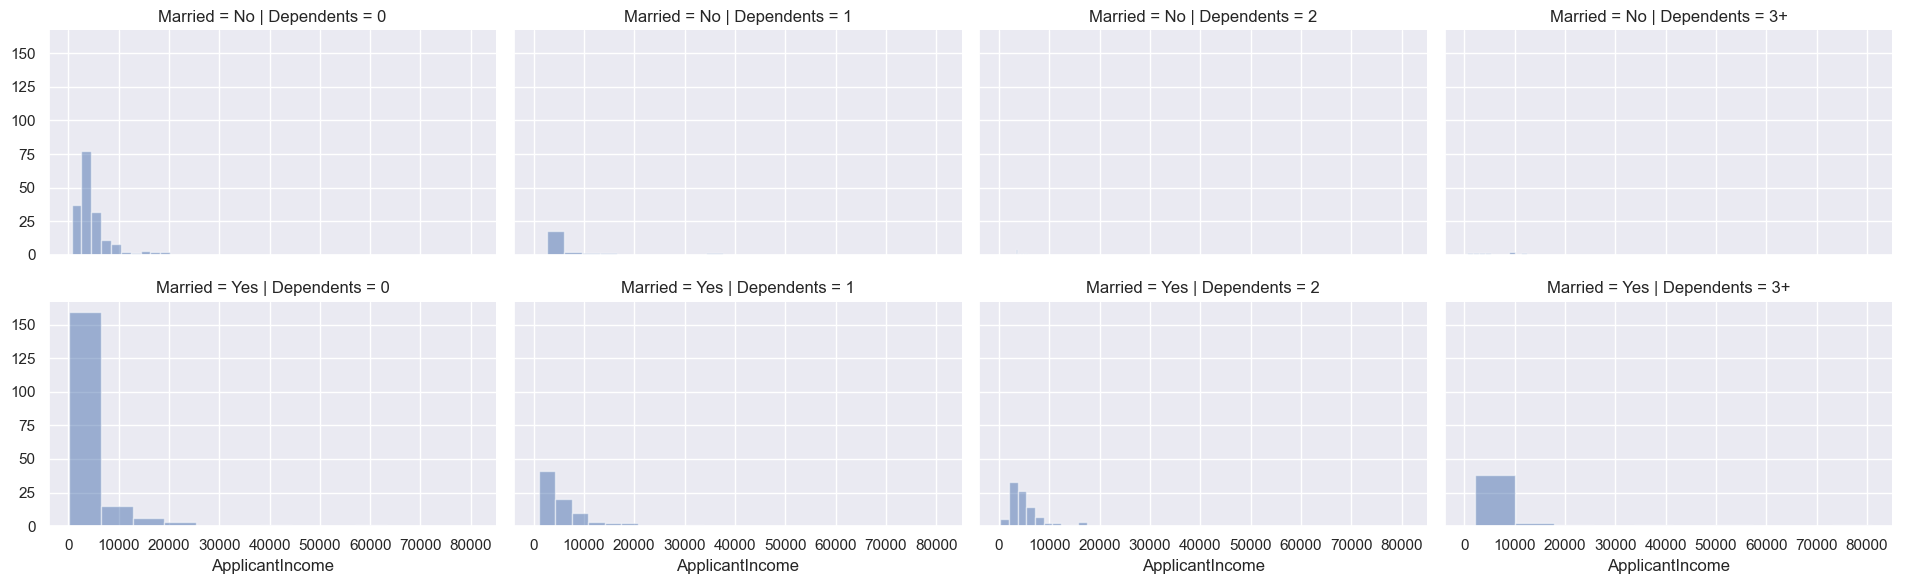

In [69]:
grid = sns.FacetGrid(df, row='Married', col='Dependents', aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

##### Interpretation:

- Across all groups, applicant incomes are heavily skewed towards the lower end, with the majority earning less than 10,000.
- High-income outliers are rare in all categories, but they do exist, particularly among married applicants with no dependents.
- The number of dependents does not significantly alter the income distribution, as most groups, regardless of dependents, have similar income patterns.
- Both married and unmarried applicants show similar income distributions, with most earning less than 10,000.

This suggests that the applicant income is generally low across all groups in this dataset, with few individuals having significantly higher incomes. The number of dependents and marital status do not drastically change the overall income distribution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


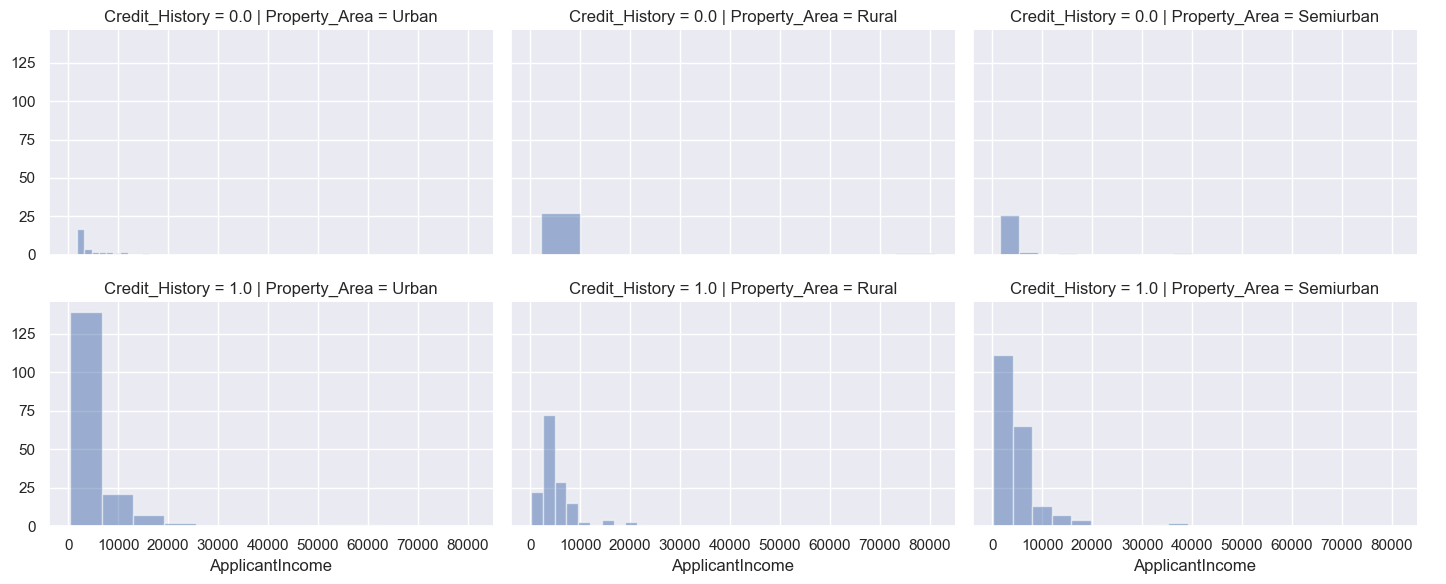

In [70]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5,bins=10)
grid.add_legend()

##### Interpretation:

- Applicants with a credit history of 1 are more prevalent across all property areas compared to those with a credit history of 0.
- Regardless of credit history or property area, the majority of applicants have incomes below 20,000. However, there is a slight spread into higher income ranges for those with a credit history of 1.
- Semiurban areas tend to have a higher number of applicants compared to urban and rural areas, irrespective of credit history.

The plots suggest that credit history has a significant impact on the number of applicants, with a good credit history (1.0) being more common. Income levels are generally low across all property areas, with semiurban areas showing a slightly higher number of applicants and a broader income distribution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


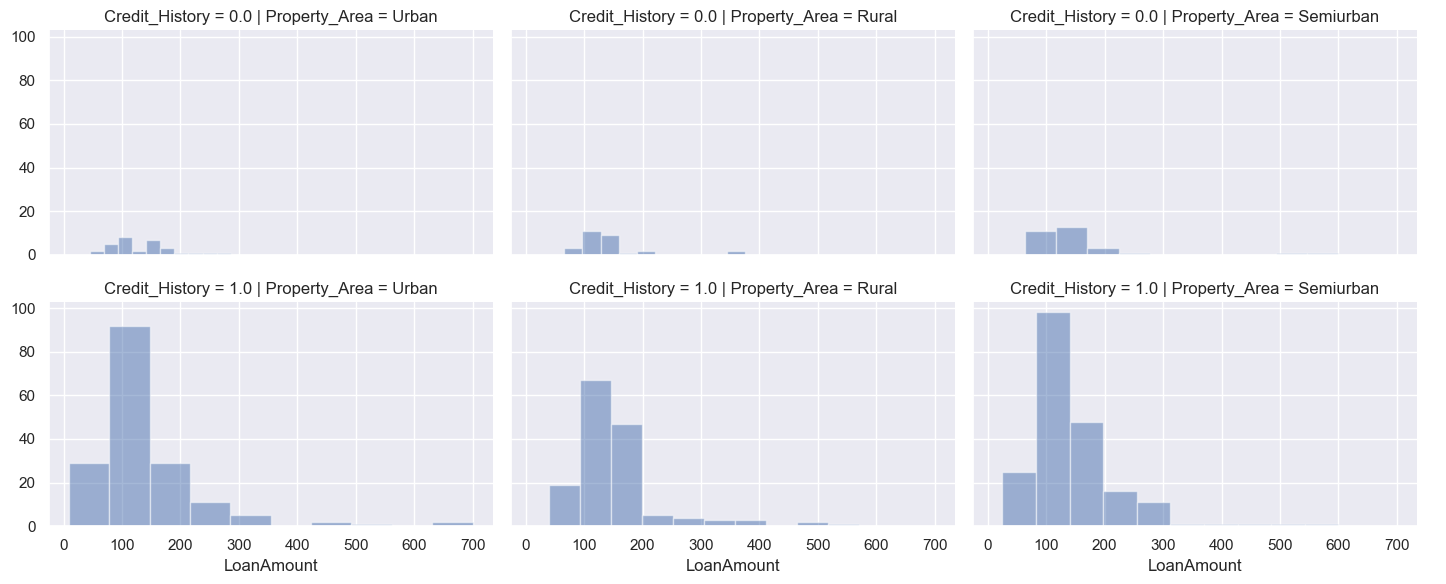

In [71]:
grid = sns.FacetGrid(df, row='Credit_History', col='Property_Area', aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=0.5, bins=10)
grid.add_legend()

##### Interpretation:

- Applicants with a credit history of 1 are more prevalent across all property areas compared to those with a credit history of 0.
- Regardless of credit history or property area, the majority of loan amounts are below 200. However, those with a credit history of 1 show a broader distribution, with some loan amounts reaching up to 600.
- Semiurban areas tend to have a higher number of loan applicants compared to urban and rural areas, irrespective of credit history.

The plots suggest that credit history significantly impacts the number of loan applicants, with a good credit history (1.0) being more common. Loan amounts are generally low across all property areas, but there is a noticeable spread into higher loan amounts for those with a good credit history.

C:\Users\home\AppData\Local\Temp\ipykernel_3048\13355105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], fit=stats.norm)


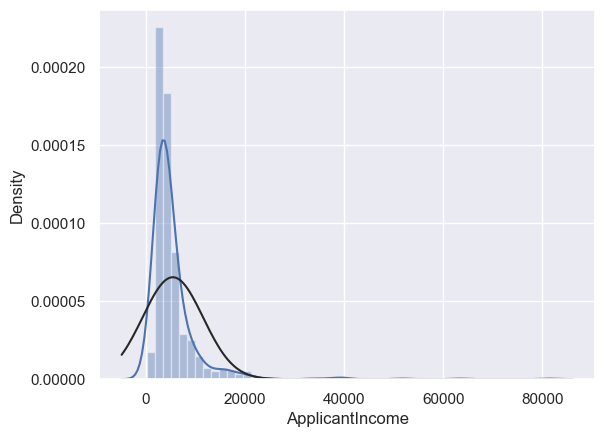

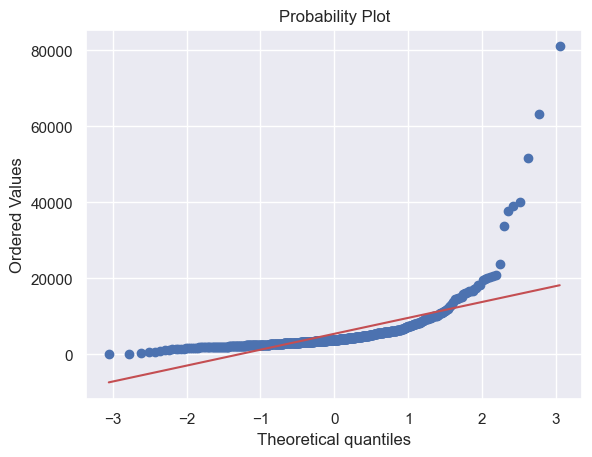

In [72]:
sns.distplot(df['ApplicantIncome'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df['ApplicantIncome'], plot=plt)

##### Interpretation:

For the distribution plot:

- The distribution of 'ApplicantIncome' is heavily skewed to the right. This means that most applicants have a lower income, with a few having very high incomes.
- There is a sharp peak at the lower end of the income scale, indicating that a large number of applicants have relatively low incomes.
- The long tail on the right indicates the presence of outliers with very high incomes.

For the probability plot:

- The points deviate significantly from the straight line, especially in the tails. This further confirms that the distribution of 'ApplicantIncome' is not normal.
- The points in the lower and upper ends (tails) of the plot show significant deviation from the line, indicating heavy tails.

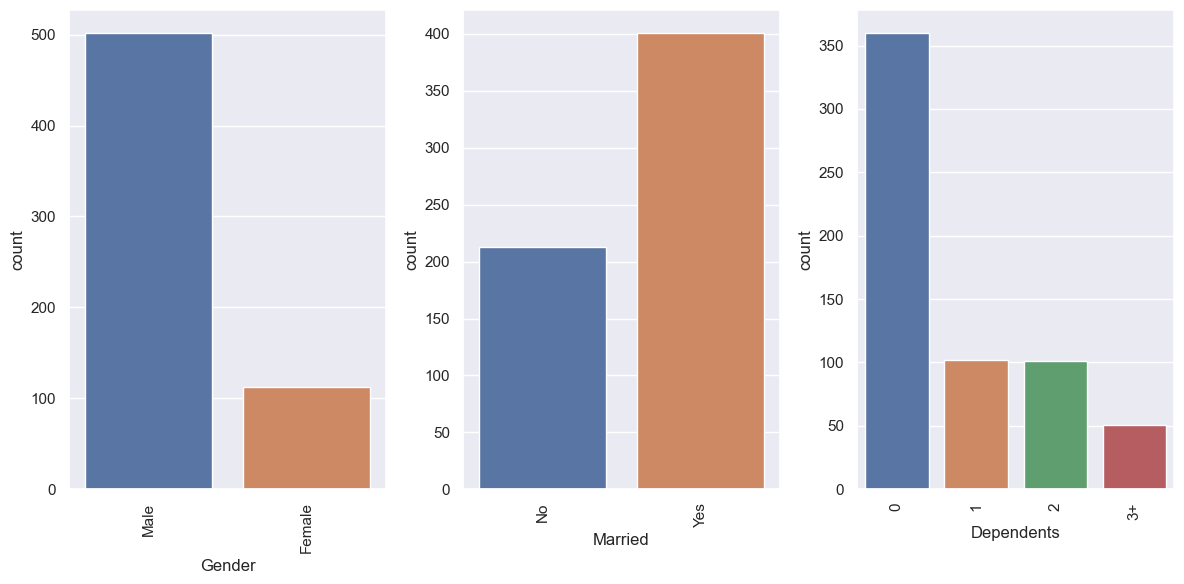

<Figure size 640x480 with 0 Axes>

In [73]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6))

g = sns.countplot(x='Gender', data=df, ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(x='Married', data=df, ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(x='Dependents', data=df, ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

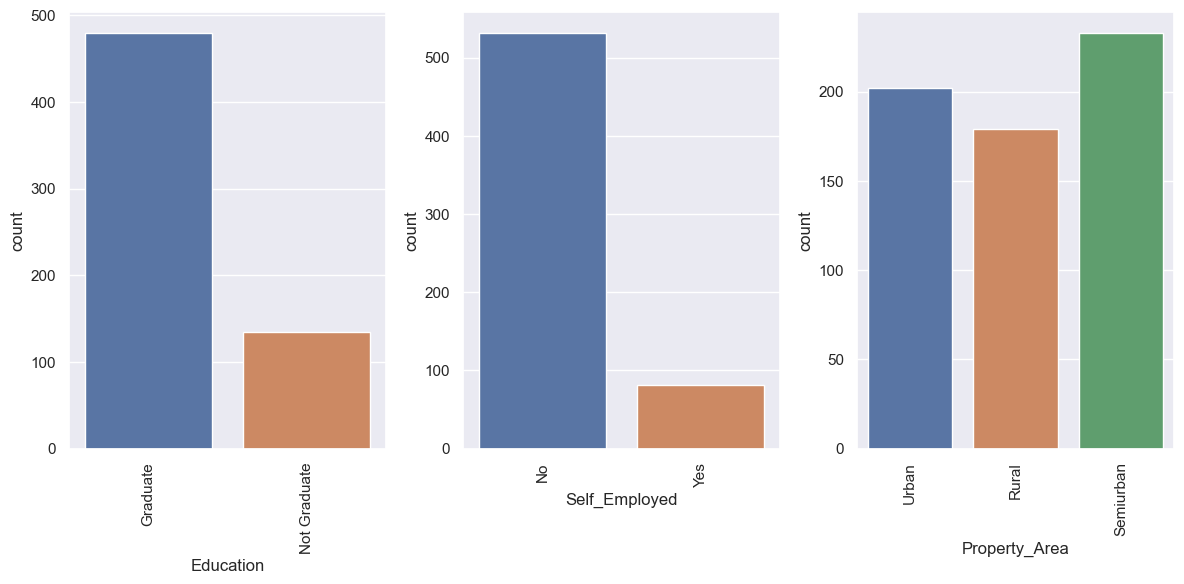

<Figure size 640x480 with 0 Axes>

In [74]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6))

g = sns.countplot(x='Education', data=df, ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(x='Self_Employed', data=df, ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(x='Property_Area', data=df, ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


##### Interpretation: 

- Both applicant and coapplicant incomes show significant variability, with some very high-income outliers.
- A significant number of coapplicants have no income.
- There are outliers in the loan amounts, but most loans are centered around 129.
- Most loan terms are 360 months, indicating a common loan duration.
- Most applicants have a credit history, which could be crucial for loan approval.

In [76]:
df[['Gender', 'ApplicantIncome']].groupby(['Gender'],
                                                as_index = False).mean().sort_values(by = 'Gender', ascending = False)

,Gender,ApplicantIncome
1,Male,5573.017928
0,Female,4643.473214


##### Interpretation:

- The average applicant income for males is approximately 5573.02.
- The average applicant income for females is approximately 4643.47.

- On average, male applicants have a higher income compared to female applicants. The difference is roughly 929.54.
- This difference could have various implications, such as higher incomes might affect loan approval rates and amounts, with male applicants potentially being eligible for larger loans.


In [77]:
df[['Married', 'ApplicantIncome']].groupby(['Married'],
                                               as_index = False).mean().sort_values(by = 'Married', ascending = False)

,Married,ApplicantIncome
1,Yes,5633.496259
0,No,4970.384977


##### Interpretation:

- On average, married applicants have a higher income (5633.50) compared to unmarried applicants (4970.38).
- Marital status might influence income levels, potentially due to dual incomes in households or stability in employment.

In [78]:
df[['Dependents', 'ApplicantIncome']].groupby(['Dependents'],
                                               as_index = False).mean().sort_values(by = 'Dependents', ascending = False)

,Dependents,ApplicantIncome
3,3+,8581.215686
2,2,4926.782178
1,1,5962.274510
0,0,4928.680556


##### Interpretation:

- Applicants with 3 or more dependents have significantly higher incomes (8581.22) compared to those with fewer dependents.
- Applicants with 1 dependent also have a higher average income (5962.27) compared to those with 2 or 0 dependents, who have similar average incomes around 4927.
- Higher income levels for those with more dependents might be a reflection of higher earning responsibilities or dual income in larger households.

In [79]:
df[['Education', 'ApplicantIncome']].groupby(['Education'],
                                            as_index = False).mean().sort_values(by = 'Education', ascending = False)

,Education,ApplicantIncome
1,Not Graduate,3777.283582
0,Graduate,5857.433333


##### Interpretation:

- Graduates have a significantly higher average income (5857.43) compared to non-graduates (3777.28).
- Education level has a strong correlation with income, suggesting higher qualifications lead to better-paying jobs.

In [80]:
df[['Self_Employed', 'ApplicantIncome']].groupby(['Self_Employed'],
                                                as_index = False).mean().sort_values(by = 'Self_Employed', ascending = False)

,Self_Employed,ApplicantIncome
1,Yes,7380.817073
0,No,5098.678571


##### Interpretation:

- Self-employed individuals have a higher average income (7380.82) compared to those who are not self-employed (5098.68).
- Self-employment can lead to higher income, potentially due to business ownership and entrepreneurial success.

In [81]:
df[['Gender', 'Married', 'ApplicantIncome']].groupby(['Gender', 'Married'],
                                                    as_index = False).mean().sort_values(by = 'Gender', ascending = False)

,Gender,Married,ApplicantIncome
2,Male,No,5251.045113
3,Male,Yes,5689.067751
0,Female,No,4503.787500
1,Female,Yes,4992.687500


##### Interpretation:

- Married males have a higher average income (5689.07) than unmarried males (5251.05).
- Married females have a higher average income (4992.69) compared to unmarried females (4503.79).
- Marriage tends to increase income across both genders, with males consistently earning more on average than females in both marital statuses.

In [82]:
df.groupby(['Gender']).size()

Gender
Female    112
Male      502
dtype: int64

In [83]:
df.groupby(['Gender']).size()[0]/(df.groupby(['Gender']).size()[0] + 
                                 df.groupby(['Gender']).size()[1])

0.18241042345276873

##### Interpretation:

- 18.24% of the applicants in the dataset are female, indicating a gender disparity with fewer female applicants compared to male applicants.

In [84]:
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(int)
df['Dependents'] = df['Dependents'].astype(int)

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [86]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [87]:
X, y = df.iloc[:, 1:-1], df.iloc[:, -1]

In [88]:
X = pd.get_dummies(X)

In [89]:
dtrain = pd.get_dummies(df)

In [102]:
from xgboost import XGBClassifier, DMatrix, cv
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV

In [91]:
train = dtrain
target = 'Loan_Status'
IDcol = 'Loan_ID'

### XGBOOST

In [103]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = DMatrix(dtrain[predictors].values, label=dtrain['Loan_Status'].values)
        cvresult = cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                      nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Loan_Status'], 
            eval_set=[(dtrain[predictors], dtrain['Loan_Status'])],
            verbose=True)
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:, 1]
        
    # Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Loan_Status'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Loan_Status'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

[0]	validation_0-logloss:0.58777
[1]	validation_0-logloss:0.57597
[2]	validation_0-logloss:0.55387
[3]	validation_0-logloss:0.53575
[4]	validation_0-logloss:0.52695
[5]	validation_0-logloss:0.50744
[6]	validation_0-logloss:0.49277
[7]	validation_0-logloss:0.48214
[8]	validation_0-logloss:0.46904
[9]	validation_0-logloss:0.45972
[10]	validation_0-logloss:0.45483
[11]	validation_0-logloss:0.44528
[12]	validation_0-logloss:0.43939
[13]	validation_0-logloss:0.43136
[14]	validation_0-logloss:0.42460
[15]	validation_0-logloss:0.41619
[16]	validation_0-logloss:0.40912
[17]	validation_0-logloss:0.40279
[18]	validation_0-logloss:0.39800
[19]	validation_0-logloss:0.39238
[20]	validation_0-logloss:0.38718
[21]	validation_0-logloss:0.38242
[22]	validation_0-logloss:0.37734
[23]	validation_0-logloss:0.37128
[24]	validation_0-logloss:0.36796
[25]	validation_0-logloss:0.36474
[26]	validation_0-logloss:0.36280
[27]	validation_0-logloss:0.35967
[28]	validation_0-logloss:0.35600
[29]	validation_0-loglos

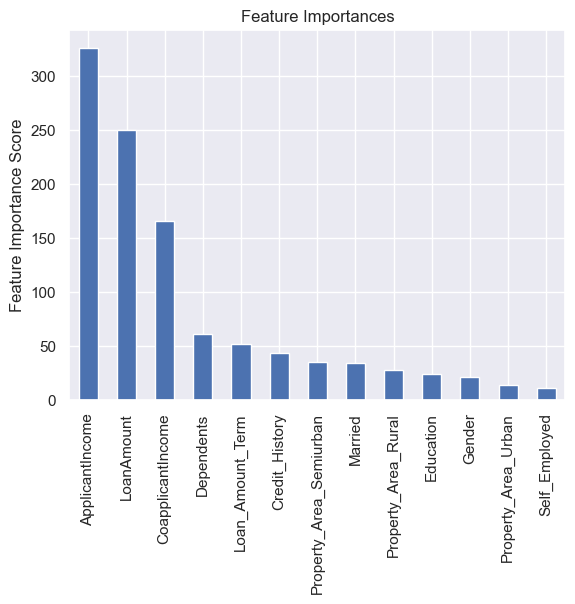

In [104]:
# Assuming `train` is your training dataset and `target` and `IDcol` are defined
# Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

modelfit(xgb2, train, predictors)


### Parameter Tuning For XGBoost model

In [106]:
param_test1 = { 'max_depth':list(range(3,10,2)), 'min_child_weight':list(range(1,6,2))}

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv=5)

gsearch1.fit(train[predictors], train[target])

print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'mean_fit_time': array([0.84698319, 0.93685255, 0.96460648, 1.13415208, 1.07632165,
       1.07309532, 1.26710443, 1.20073223, 1.17682672, 1.31154985,
       1.22535009, 1.16113815]), 'std_fit_time': array([0.02621202, 0.05433479, 0.02710186, 0.04412514, 0.01214308,
       0.02495249, 0.08502837, 0.07090832, 0.0345416 , 0.04958345,
       0.01616133, 0.02953291]), 'mean_score_time': array([0.30021458, 0.31932096, 0.35094934, 0.3846446 , 0.35329103,
       0.37101455, 0.39401078, 0.36149774, 0.37360373, 0.39081707,
       0.38545084, 0.33148613]), 'std_score_time': array([0.02903321, 0.01288737, 0.01513624, 0.03000619, 0.0097953 ,
       0.04973448, 0.0780999 , 0.02560872, 0.02144941, 0.03736586,
       0.02058923, 0.06438072]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_ch

In [111]:
param_test2 = { 'max_depth':[8,9,10], 'min_child_weight':[4,5,6] }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(train[predictors],train[target])
print(gsearch2.cv_results_)
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'mean_fit_time': array([0.91858582, 1.04243846, 1.04042172, 1.15846925, 1.0852705 ,
       1.06675172, 1.12198887, 1.12011013, 1.01100059]), 'std_fit_time': array([0.03879616, 0.05781613, 0.01609017, 0.03785677, 0.01619913,
       0.02910817, 0.01685281, 0.03396361, 0.16274616]), 'mean_score_time': array([0.29302111, 0.34384098, 0.32656178, 0.33809805, 0.34532051,
       0.3546999 , 0.34124122, 0.32552743, 0.31329031]), 'std_score_time': array([0.0292886 , 0.03128193, 0.03310974, 0.03318776, 0.03156725,
       0.04115834, 0.02669808, 0.02697219, 0.07327243]), 'param_max_depth': masked_array(data=[8, 8, 8, 9, 9, 9, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dt

In [112]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2b.fit(train[predictors],train[target])
print(gsearch2b.cv_results_)
print(gsearch2b.best_params_)
print(gsearch2b.best_score_)

{'mean_fit_time': array([0.98314481, 1.1114265 , 1.09328141, 1.1000782 ]), 'std_fit_time': array([0.04841421, 0.02724514, 0.04332023, 0.03952995]), 'mean_score_time': array([0.34609938, 0.35049295, 0.3843338 , 0.3211441 ]), 'std_score_time': array([0.05938805, 0.00892624, 0.04878982, 0.03209308]), 'param_min_child_weight': masked_array(data=[6, 8, 10, 12],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_child_weight': 6}, {'min_child_weight': 8}, {'min_child_weight': 10}, {'min_child_weight': 12}], 'split0_test_score': array([0.76904025, 0.76687307, 0.75665635, 0.75820433]), 'split1_test_score': array([0.75820433, 0.76919505, 0.76594427, 0.76563467]), 'split2_test_score': array([0.74328449, 0.7481685 , 0.73840049, 0.7239011 ]), 'split3_test_score': array([0.82844933, 0.84096459, 0.83821734, 0.83547009]), 'split4_test_score': array([0.7033208 , 0.71616541, 0.72305764, 0.73684211]), 'mean_test_score': array([0.76045984, 0

In [113]:
param_test2c = {
 'min_child_weight':[6,7]
}
gsearch2c = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2c.fit(train[predictors],train[target])
print(gsearch2c.cv_results_)
print(gsearch2c.best_params_)
print(gsearch2c.best_score_)

{'mean_fit_time': array([0.93669   , 0.99895329, 1.03225374, 1.07483096]), 'std_fit_time': array([0.0451658 , 0.0214441 , 0.02029724, 0.03344602]), 'mean_score_time': array([0.31120563, 0.3138948 , 0.35888438, 0.33417206]), 'std_score_time': array([0.00985254, 0.03504359, 0.01903235, 0.0256731 ]), 'param_min_child_weight': masked_array(data=[6, 8, 10, 12],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_child_weight': 6}, {'min_child_weight': 8}, {'min_child_weight': 10}, {'min_child_weight': 12}], 'split0_test_score': array([0.76904025, 0.76687307, 0.75665635, 0.75820433]), 'split1_test_score': array([0.75820433, 0.76919505, 0.76594427, 0.76563467]), 'split2_test_score': array([0.74328449, 0.7481685 , 0.73840049, 0.7239011 ]), 'split3_test_score': array([0.82844933, 0.84096459, 0.83821734, 0.83547009]), 'split4_test_score': array([0.7033208 , 0.71616541, 0.72305764, 0.73684211]), 'mean_test_score': array([0.76045984, 0

### Tuning Gamma

In [114]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(train[predictors],train[target])
print(gsearch3.cv_results_)
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'mean_fit_time': array([0.84090924, 1.01477709, 0.96421676, 1.08573833, 1.09426451]), 'std_fit_time': array([0.07853347, 0.02280905, 0.0352441 , 0.07114369, 0.16639646]), 'mean_score_time': array([0.27600131, 0.29063263, 0.3207974 , 0.40852294, 0.32972178]), 'std_score_time': array([0.03185438, 0.02563942, 0.02086156, 0.03212964, 0.07787866]), 'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.0}, {'gamma': 0.1}, {'gamma': 0.2}, {'gamma': 0.3}, {'gamma': 0.4}], 'split0_test_score': array([0.76904025, 0.77337461, 0.7749226 , 0.7749226 , 0.7749226 ]), 'split1_test_score': array([0.75820433, 0.75758514, 0.76006192, 0.75077399, 0.75232198]), 'split2_test_score': array([0.74328449, 0.74664225, 0.73168498, 0.74847375, 0.753663  ]), 'split3_test_score': array([0.82844933, 0.83058608, 0.82478632, 0.81868132, 0.82173382]), 'split4_test_score': array([0.703320

[0]	validation_0-logloss:0.59167
[1]	validation_0-logloss:0.56990
[2]	validation_0-logloss:0.55135
[3]	validation_0-logloss:0.53678
[4]	validation_0-logloss:0.52284
[5]	validation_0-logloss:0.51110
[6]	validation_0-logloss:0.49984
[7]	validation_0-logloss:0.49151
[8]	validation_0-logloss:0.48348
[9]	validation_0-logloss:0.47553
[10]	validation_0-logloss:0.46947
[11]	validation_0-logloss:0.46290
[12]	validation_0-logloss:0.45831
[13]	validation_0-logloss:0.45363
[14]	validation_0-logloss:0.44913
[15]	validation_0-logloss:0.44463
[16]	validation_0-logloss:0.44033
[17]	validation_0-logloss:0.43749
[18]	validation_0-logloss:0.43437
[19]	validation_0-logloss:0.43076
[20]	validation_0-logloss:0.42808
[21]	validation_0-logloss:0.42559
[22]	validation_0-logloss:0.42287
[23]	validation_0-logloss:0.41997
[24]	validation_0-logloss:0.41765
[25]	validation_0-logloss:0.41483
[26]	validation_0-logloss:0.41259
[27]	validation_0-logloss:0.41086
[28]	validation_0-logloss:0.40866
[29]	validation_0-loglos

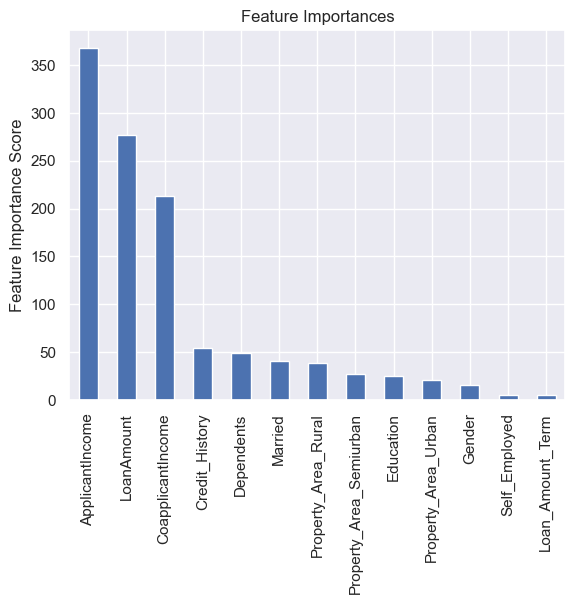

In [115]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)

### Tuning subsample and colsample_bytree

In [116]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(train[predictors],train[target])
print(gsearch4.cv_results_)
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'mean_fit_time': array([0.97870522, 1.18464437, 1.22729783, 1.24997807, 1.22986069,
       1.28720622, 1.29568148, 1.35059986, 1.30902572, 1.3480001 ,
       1.36311245, 1.38222718, 1.3184186 , 1.36179042, 1.38967652,
       1.41693969]), 'std_fit_time': array([0.08423005, 0.04637586, 0.07734921, 0.04810855, 0.02096048,
       0.03253133, 0.02688114, 0.0103902 , 0.034486  , 0.03480878,
       0.04502569, 0.03789211, 0.02773101, 0.0170995 , 0.04254784,
       0.01384198]), 'mean_score_time': array([0.30613456, 0.32765222, 0.33878226, 0.33750997, 0.35923362,
       0.33451905, 0.35147572, 0.35873847, 0.40320463, 0.37236929,
       0.3631546 , 0.36009111, 0.39481306, 0.38370118, 0.37223511,
       0.34451818]), 'std_score_time': array([0.04847875, 0.0117604 , 0.00623582, 0.01136614, 0.00510387,
       0.03036139, 0.02738728, 0.03487336, 0.03167738, 0.03900168,
       0.0227668 , 0.05379199, 0.03480294, 0.03187376, 0.04357555,
       0.06454212]), 'param_colsample_bytree': masked_array(da

In [117]:
param_test4a = {
 'subsample':[i/10.0 for i in range(9,12)],
 'colsample_bytree':[i/10.0 for i in range(9,12)]
}
gsearch4a = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(train[predictors],train[target])
print(gsearch4.cv_results_) 
print(gsearch4.best_params_) 
print(gsearch4.best_score_)

{'mean_fit_time': array([1.05907779, 1.19281383, 1.29267015, 1.30749431, 1.31099334,
       1.3288909 , 1.36397591, 1.38470283, 1.35316801, 1.40226126,
       1.43343968, 1.42273927, 1.39199615, 1.35187511, 1.41523085,
       1.5057652 ]), 'std_fit_time': array([0.05619506, 0.02215064, 0.04993369, 0.02346331, 0.01613967,
       0.04559393, 0.05237752, 0.03017009, 0.03050006, 0.05042808,
       0.03869899, 0.03155265, 0.0655697 , 0.03615488, 0.05421457,
       0.07664991]), 'mean_score_time': array([0.31576486, 0.36597476, 0.37010531, 0.34509363, 0.40274544,
       0.3803041 , 0.38181262, 0.3751668 , 0.402775  , 0.3836267 ,
       0.35225801, 0.35451732, 0.371843  , 0.34794912, 0.34630361,
       0.34475708]), 'std_score_time': array([0.0480806 , 0.0738702 , 0.03025794, 0.02519466, 0.02686371,
       0.02990919, 0.05184568, 0.03272041, 0.03642241, 0.02318736,
       0.02910771, 0.03784756, 0.03525304, 0.03616922, 0.03312334,
       0.05248473]), 'param_colsample_bytree': masked_array(da

In [118]:
param_test5 = {
 'subsample':[i/100.0 for i in range(95,105,5)],
 'colsample_bytree':[i/100.0 for i in range(95,105,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(train[predictors],train[target])
print(gsearch5.cv_results_)
print(gsearch5.best_params_) 
print(gsearch5.best_score_)

{'mean_fit_time': array([1.14306355, 1.35066199, 1.37686205, 1.42363453]), 'std_fit_time': array([0.06528886, 0.0315941 , 0.07072074, 0.01917179]), 'mean_score_time': array([0.32306471, 0.37119613, 0.3776238 , 0.33883533]), 'std_score_time': array([0.01774968, 0.01348496, 0.01655875, 0.02066857]), 'param_colsample_bytree': masked_array(data=[0.95, 0.95, 1.0, 1.0],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.95, 1.0, 0.95, 1.0],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'colsample_bytree': 0.95, 'subsample': 0.95}, {'colsample_bytree': 0.95, 'subsample': 1.0}, {'colsample_bytree': 1.0, 'subsample': 0.95}, {'colsample_bytree': 1.0, 'subsample': 1.0}], 'split0_test_score': array([0.79071207, 0.78359133, 0.78421053, 0.78142415]), 'split1_test_score': array([0.76532508, 0.75727554, 0.75108359, 0.75665635]), 'split2_test_score': arr

### Tuning reg_alpha

In [119]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(train[predictors],train[target])
print(gsearch6.cv_results_)
print(gsearch6.best_params_)
print(gsearch6.best_score_)

{'mean_fit_time': array([1.10129247, 1.23162217, 1.30584927, 1.2320724 , 0.9528172 ]), 'std_fit_time': array([0.07550629, 0.06840886, 0.02914517, 0.03316041, 0.13724825]), 'mean_score_time': array([0.29275565, 0.31939197, 0.32692661, 0.32777781, 0.30407085]), 'std_score_time': array([0.0123288 , 0.03123829, 0.03935049, 0.02686037, 0.07359303]), 'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'reg_alpha': 1e-05}, {'reg_alpha': 0.01}, {'reg_alpha': 0.1}, {'reg_alpha': 1}, {'reg_alpha': 100}], 'split0_test_score': array([0.79071207, 0.79195046, 0.78204334, 0.77801858, 0.5       ]), 'split1_test_score': array([0.76532508, 0.76594427, 0.76594427, 0.77987616, 0.5       ]), 'split2_test_score': array([0.76404151, 0.77075702, 0.76373626, 0.77930403, 0.5       ]), 'split3_test_score': array([0.83821734, 0.83424908, 0.82753358, 0.83669109, 0.5       ]), 'split4_te

In [120]:
param_test6a = {
 'reg_alpha':[1,2,3,4,5]
}
gsearch6a = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6a, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6a.fit(train[predictors],train[target])
print(gsearch6a.cv_results_)
print(gsearch6a.best_params_) 
print(gsearch6a.best_score_)

{'mean_fit_time': array([1.03811517, 1.05014057, 1.07436962, 1.01719818, 0.97038689]), 'std_fit_time': array([0.03848886, 0.03642002, 0.02794589, 0.03121636, 0.14178637]), 'mean_score_time': array([0.28887272, 0.30908427, 0.28771086, 0.32344475, 0.30708981]), 'std_score_time': array([0.02162323, 0.03262391, 0.05023569, 0.02305727, 0.07538765]), 'param_reg_alpha': masked_array(data=[1, 2, 3, 4, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'reg_alpha': 1}, {'reg_alpha': 2}, {'reg_alpha': 3}, {'reg_alpha': 4}, {'reg_alpha': 5}], 'split0_test_score': array([0.77801858, 0.76656347, 0.76377709, 0.75820433, 0.75835913]), 'split1_test_score': array([0.77987616, 0.78049536, 0.77151703, 0.74520124, 0.74009288]), 'split2_test_score': array([0.77930403, 0.74358974, 0.73519536, 0.71749084, 0.69795482]), 'split3_test_score': array([0.83669109, 0.84279609, 0.82875458, 0.83302808, 0.81440781]), 'split4_test_score': array([0.70

[0]	validation_0-logloss:0.59232
[1]	validation_0-logloss:0.56861
[2]	validation_0-logloss:0.54867
[3]	validation_0-logloss:0.53393
[4]	validation_0-logloss:0.52067
[5]	validation_0-logloss:0.50956
[6]	validation_0-logloss:0.49856
[7]	validation_0-logloss:0.49030
[8]	validation_0-logloss:0.48175
[9]	validation_0-logloss:0.47416
[10]	validation_0-logloss:0.46726
[11]	validation_0-logloss:0.46111
[12]	validation_0-logloss:0.45583
[13]	validation_0-logloss:0.45127
[14]	validation_0-logloss:0.44643
[15]	validation_0-logloss:0.44264
[16]	validation_0-logloss:0.43829
[17]	validation_0-logloss:0.43574
[18]	validation_0-logloss:0.43252
[19]	validation_0-logloss:0.42922
[20]	validation_0-logloss:0.42681
[21]	validation_0-logloss:0.42412
[22]	validation_0-logloss:0.42150

Model Report
Accuracy : 0.8094
AUC Score (Train): 0.902282


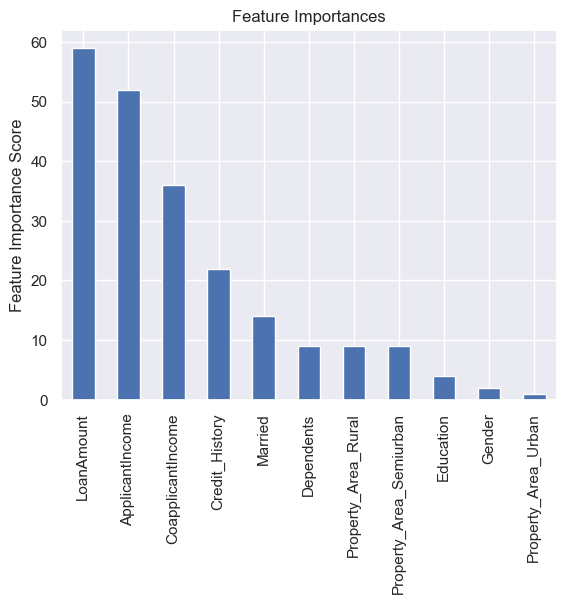

In [121]:
xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb3, train, predictors)

In [122]:
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()
X_train_std = slc.fit_transform(X)

### Applying Machine Learning Models

In [123]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

In [124]:
from xgboost.sklearn import XGBClassifier
#xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     #colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1=XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)


In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

### Voting Classifier

In [126]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [127]:
eclf.fit(X_train_std, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=400,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.95, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=N...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None, min_child_weight=6,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            nthread=4, num_parallel_tree=None, ...)),
                             ('adaboost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=1),
                                                 learning_rate=0.1,
                                                 n_estimators=500,
                                                 random_state=0))])

In [136]:
dtest = pd.read_csv(r'C:\Users\home\Desktop\MyProjects\LoanPrediction\test.csv')

In [137]:
dtest.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [138]:
dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1})
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(int)
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(int)
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1})
dtest['Dependents'] = dtest['Dependents'].str.rstrip('+')
dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0]).astype(int)
dtest['Dependents'] = dtest['Dependents'].fillna( dtest['Dependents'].dropna().mode().values[0]).astype(int)
dtest['Self_Employed'] = dtest['Self_Employed'].fillna( dtest['Self_Employed'].dropna().mode().values[0])
dtest['LoanAmount'] = dtest['LoanAmount'].fillna( dtest['LoanAmount'].dropna().mode().values[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna( dtest['Loan_Amount_Term'].dropna().mode().values[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna( dtest['Credit_History'].dropna().mode().values[0] )

In [139]:
X_test = dtest.iloc[:,1:]

In [140]:
X_test= pd.get_dummies(X_test)

In [141]:
X_test_std = slc.transform(X_test)

In [142]:
y_test_pred = eclf.predict(X_test_std)

In [143]:
dtest['Loan_Status'] = y_test_pred
df_final = dtest.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)

In [144]:
df_final['Loan_Status'] = df_final['Loan_Status'].map({0:'N', 1:'Y'})

In [145]:
df_final.to_csv('testdata_Output.csv', index=False)

In [146]:
df_final.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
